In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


In [2]:
# Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [3]:
train_data = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv")
test_data = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")

Shape

In [4]:
print(train_data.shape)
print(test_data.shape)

(175000, 17)
(50000, 16)


Numerical Data

In [5]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

In [6]:
train_data.describe(include='all')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,175000,175000,168923.000000,175000.000000,168923.000000,168923,175000.000000,175000.000000,175000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
unique,NaN,109877,109713,NaN,NaN,NaN,2,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2023-06-28 18:11:16,2023-06-29 19:08:22,NaN,NaN,NaN,N,NaN,NaN,Credit Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8,10,NaN,NaN,NaN,167729,NaN,NaN,135257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.728377,NaN,NaN,1.357678,5.145930,1.518307,NaN,132.710349,132.701429,NaN,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
std,0.445606,NaN,NaN,0.891283,394.971052,6.514678,NaN,76.148799,76.192493,NaN,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968
min,0.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,NaN,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,NaN,NaN,1.000000,1.080000,1.000000,NaN,67.000000,67.000000,NaN,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,NaN,NaN,1.000000,1.840000,1.000000,NaN,133.000000,133.000000,NaN,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,NaN,NaN,1.000000,3.610000,1.000000,NaN,199.000000,199.000000,NaN,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000


In [7]:
train_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [8]:
#tail=last 5 columns
test_data.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
49995,1,2023-06-29 17:41:59,2023-06-29 18:30:36,1.0,0.61,1.0,N,48,72,Credit Card,2.5,4.043482,0.0,1.0,2.5,0.00
49996,1,2023-06-30 01:25:25,2023-06-30 01:10:40,1.0,5.02,1.0,N,57,103,Cash,1.0,2.895882,0.0,1.0,0.0,1.75
49997,1,2023-06-30 22:28:44,2023-06-30 21:49:37,1.0,1.92,1.0,N,150,78,Credit Card,1.0,5.636590,0.0,1.0,2.5,0.00
49998,0,2023-06-30 02:37:18,2023-06-30 02:10:33,1.0,5.40,1.0,N,4,154,Credit Card,3.5,7.293144,0.0,1.0,2.5,0.00
49999,1,2023-06-30 18:05:15,2023-06-30 17:15:16,1.0,1.31,1.0,N,7,174,Cash,2.5,1.966592,0.0,1.0,2.5,0.00


In [9]:
numeric_cols = train_data.select_dtypes(include=np.number).columns.tolist()

In [10]:
numeric_cols

['VendorID',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'extra',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

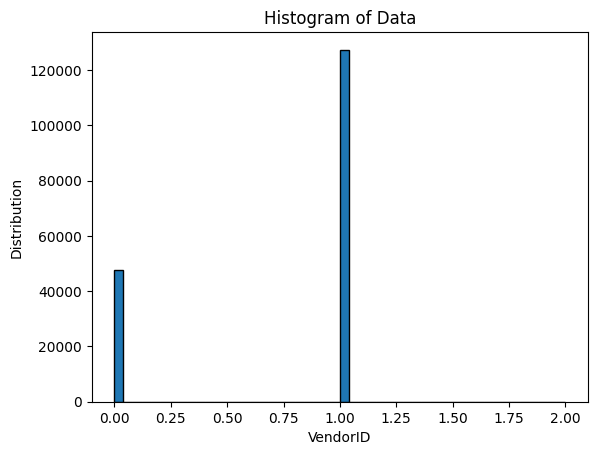

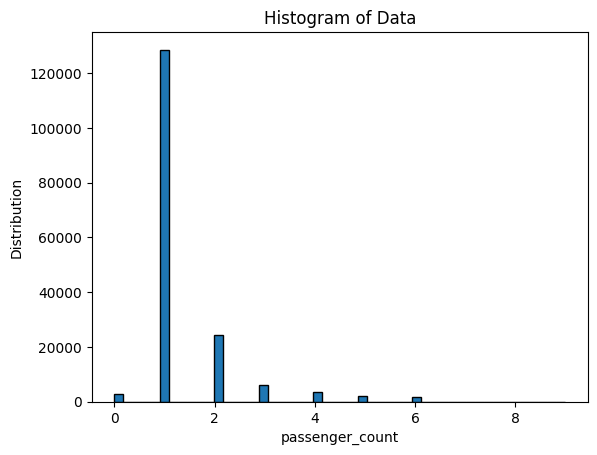

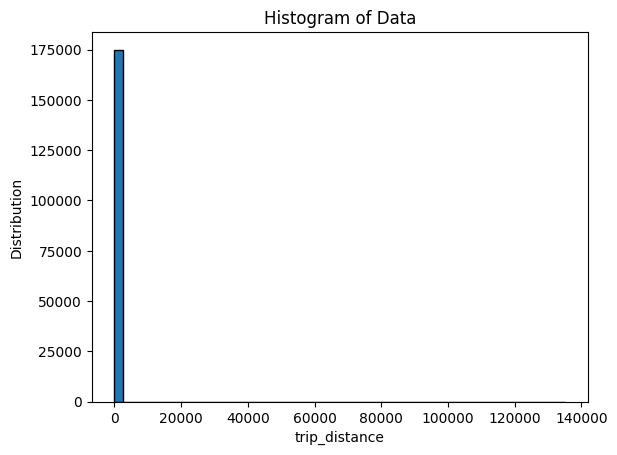

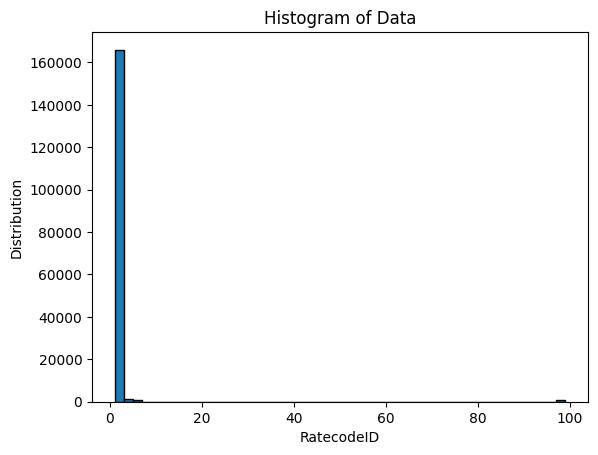

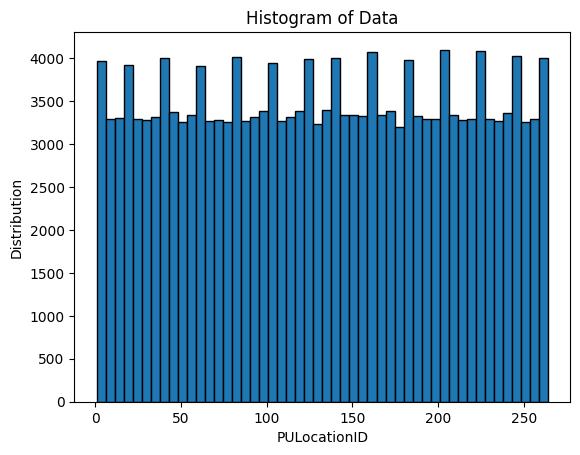

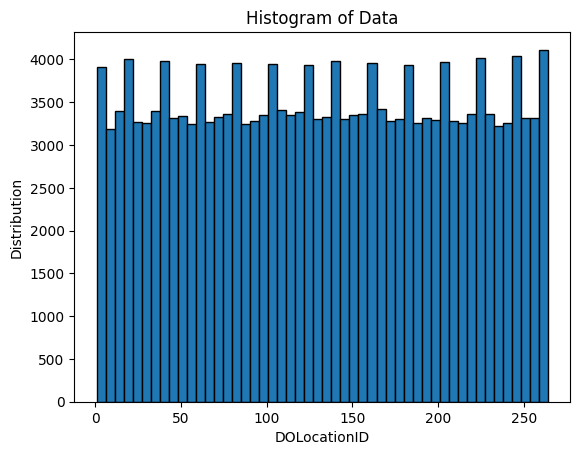

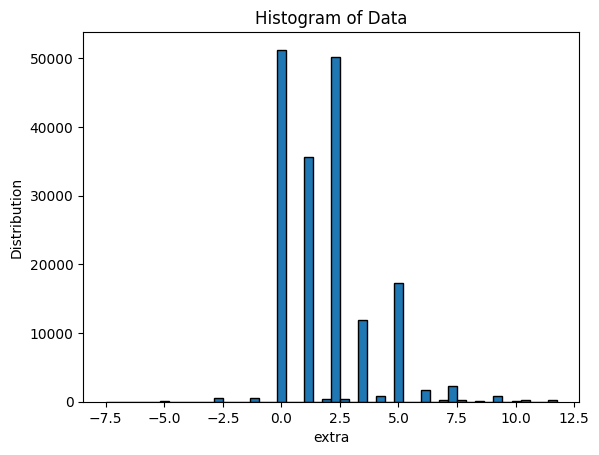

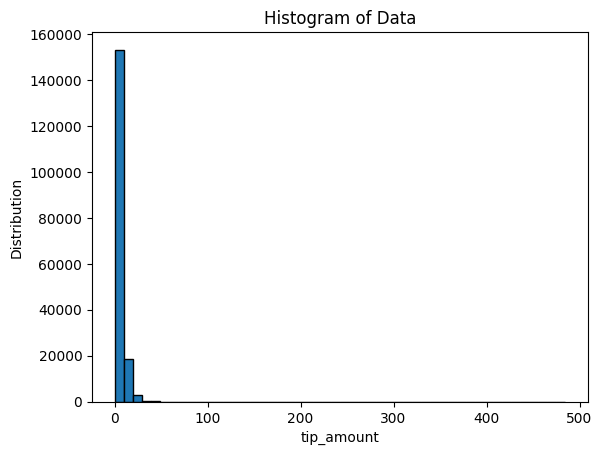

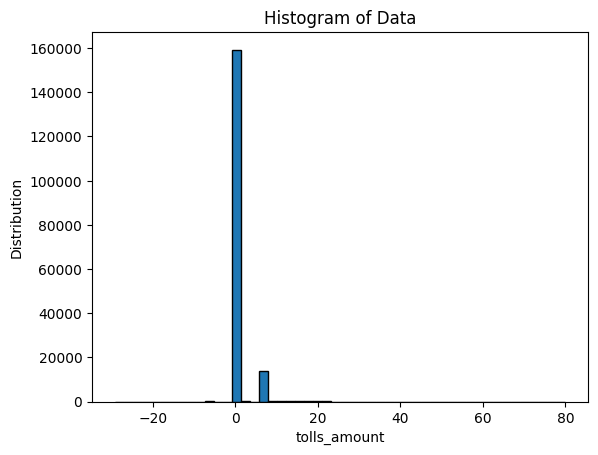

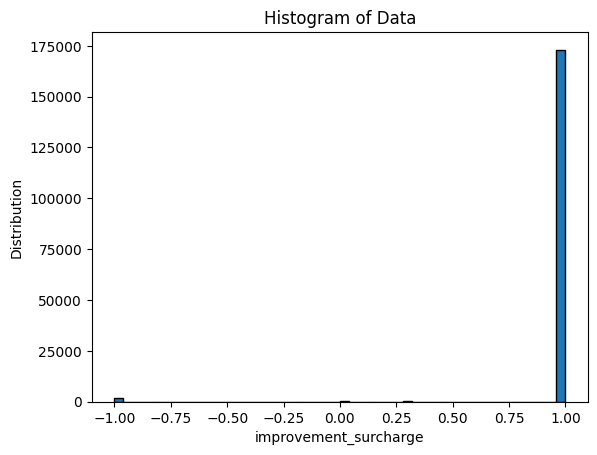

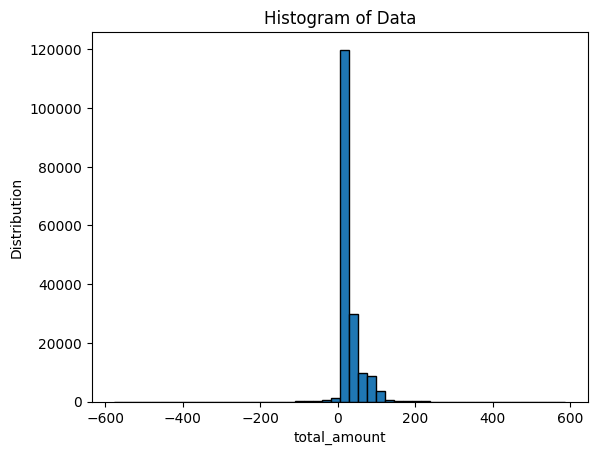

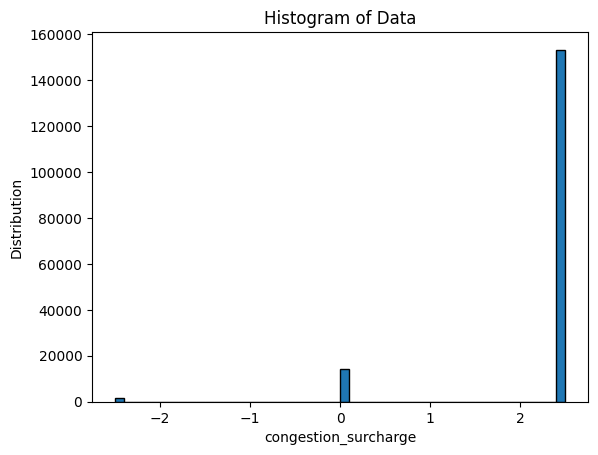

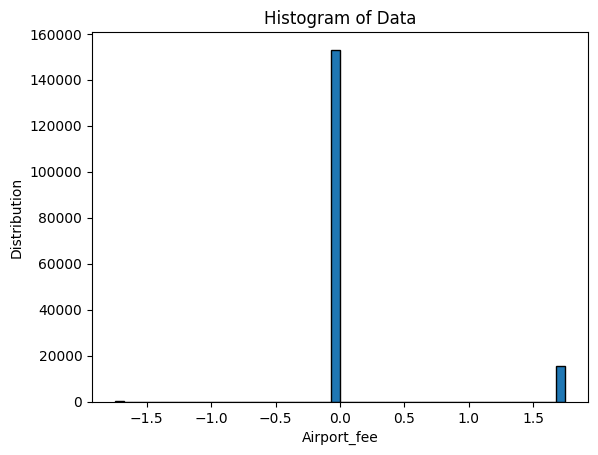

In [11]:
for i in numeric_cols:
    plt.hist(train_data[i], bins = 50, edgecolor='black')
    plt.title('Histogram of Data')
    plt.xlabel(i)
    plt.ylabel('Distribution')
    plt.show()

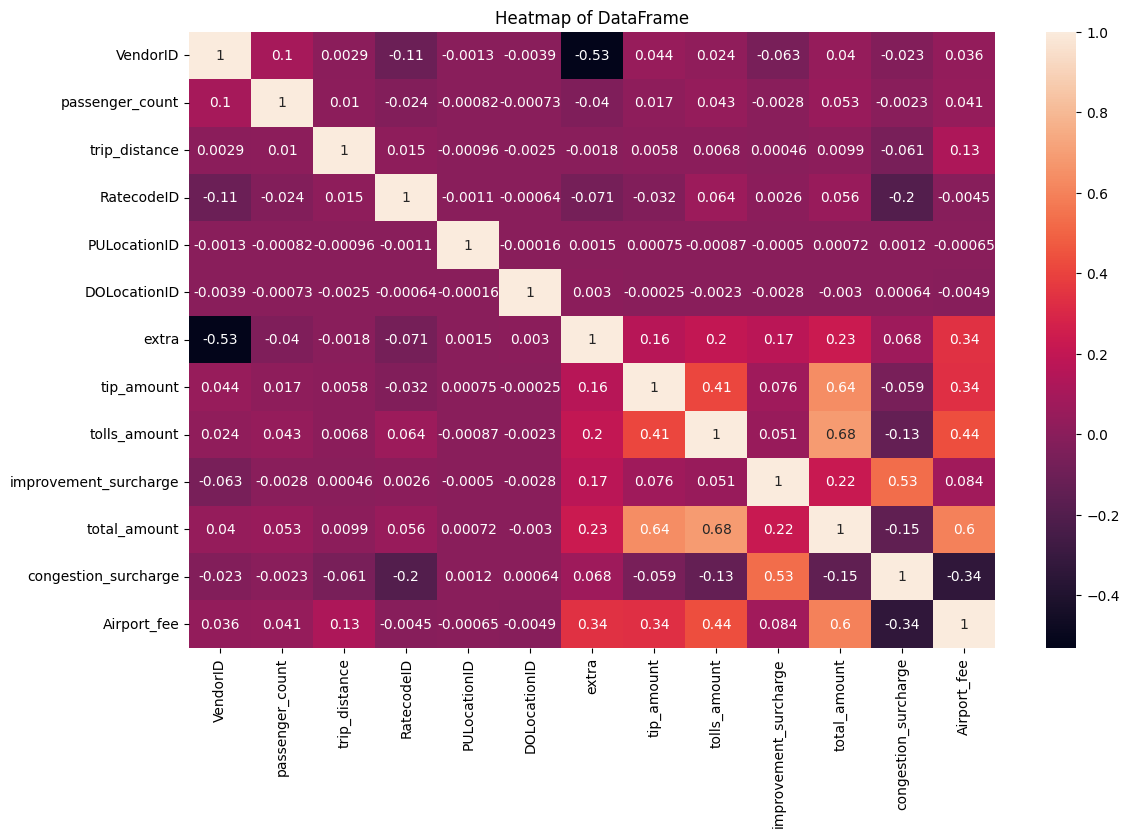

In [12]:
plt.figure(figsize=(13,8))
sns.heatmap(train_data.corr(numeric_only = True), annot=True)
plt.title('Heatmap of DataFrame')
plt.show()

In [13]:
train_data.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

In [14]:
test_data.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          1779
trip_distance               0
RatecodeID               1779
store_and_fwd_flag       1779
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     1779
Airport_fee              1779
dtype: int64

In [15]:
num_cols = ['passenger_count', 'RatecodeID', 'congestion_surcharge', 'Airport_fee']
cat_cols = ['store_and_fwd_flag']
imputer = ColumnTransformer(
    transformers=[
        ('num_impute', SimpleImputer(strategy='mean'), num_cols),
        ('cat_impute', SimpleImputer(strategy='most_frequent'), cat_cols)
    ], remainder = 'passthrough', verbose_feature_names_out = False).set_output(transform = 'pandas')
pipeline = Pipeline(steps=[('imputer', imputer)])
train_data = pipeline.fit_transform(train_data)
test_data = pipeline.fit_transform(test_data)

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   passenger_count        175000 non-null  float64
 1   RatecodeID             175000 non-null  float64
 2   congestion_surcharge   175000 non-null  float64
 3   Airport_fee            175000 non-null  float64
 4   store_and_fwd_flag     175000 non-null  object 
 5   VendorID               175000 non-null  int64  
 6   tpep_pickup_datetime   175000 non-null  object 
 7   tpep_dropoff_datetime  175000 non-null  object 
 8   trip_distance          175000 non-null  float64
 9   PULocationID           175000 non-null  int64  
 10  DOLocationID           175000 non-null  int64  
 11  payment_type           175000 non-null  object 
 12  extra                  175000 non-null  float64
 13  tip_amount             175000 non-null  float64
 14  tolls_amount           175000 non-nu

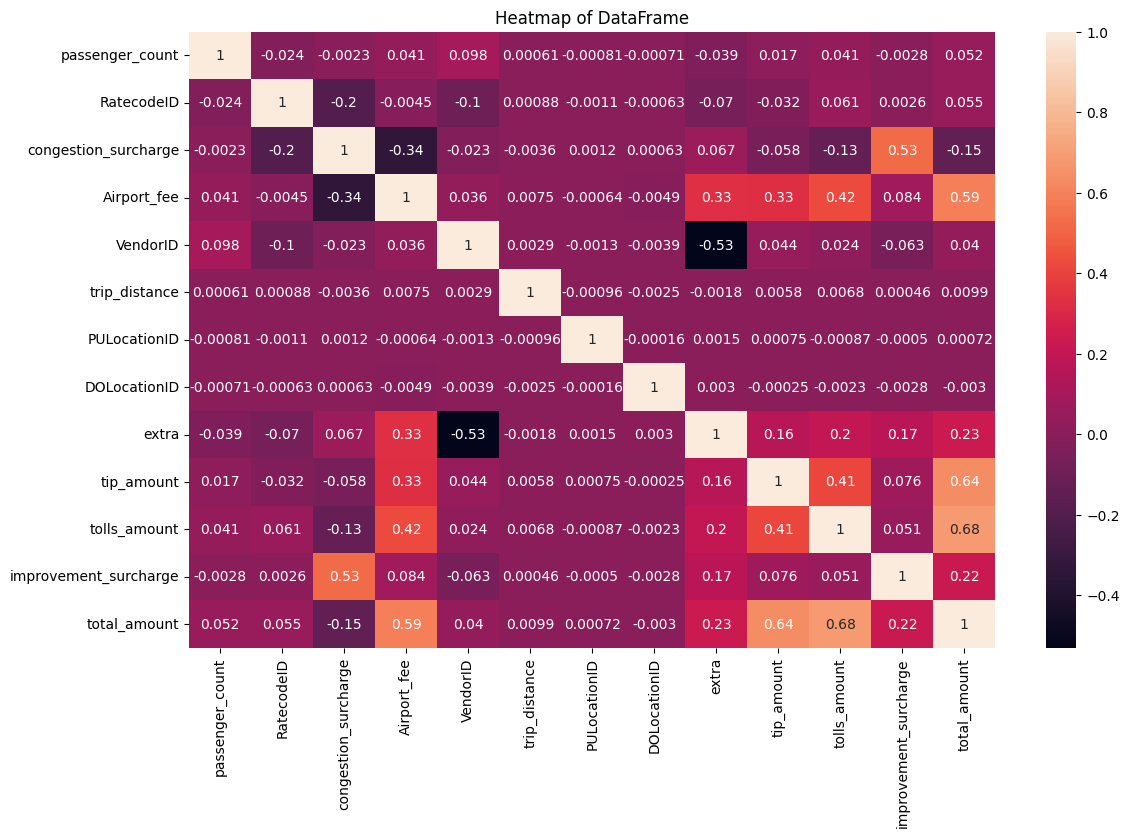

In [17]:
plt.figure(figsize=(13,8))
sns.heatmap(train_data.corr(numeric_only = True), annot=True)
plt.title('Heatmap of DataFrame')
plt.show()

In [18]:
cat_cols = ['store_and_fwd_flag', 'payment_type']
encoder = ColumnTransformer(
    transformers=[
        ('num_ord', OrdinalEncoder(), cat_cols)
    ], remainder = 'passthrough', verbose_feature_names_out = False).set_output(transform = 'pandas')
pipeline = Pipeline(steps=[('encoder', encoder)])
train_data = pipeline.fit_transform(train_data)
test_data = pipeline.fit_transform(test_data)

In [19]:
train_data.pop('tpep_pickup_datetime')
test_data.pop('tpep_pickup_datetime')

train_data.pop('tpep_dropoff_datetime')
test_data.pop('tpep_dropoff_datetime')

0        2023-06-29 00:25:20
1        2023-06-30 17:53:13
2        2023-06-29 19:23:48
3        2023-06-30 21:46:20
4        2023-06-29 15:22:17
                ...         
49995    2023-06-29 18:30:36
49996    2023-06-30 01:10:40
49997    2023-06-30 21:49:37
49998    2023-06-30 02:10:33
49999    2023-06-30 17:15:16
Name: tpep_dropoff_datetime, Length: 50000, dtype: object

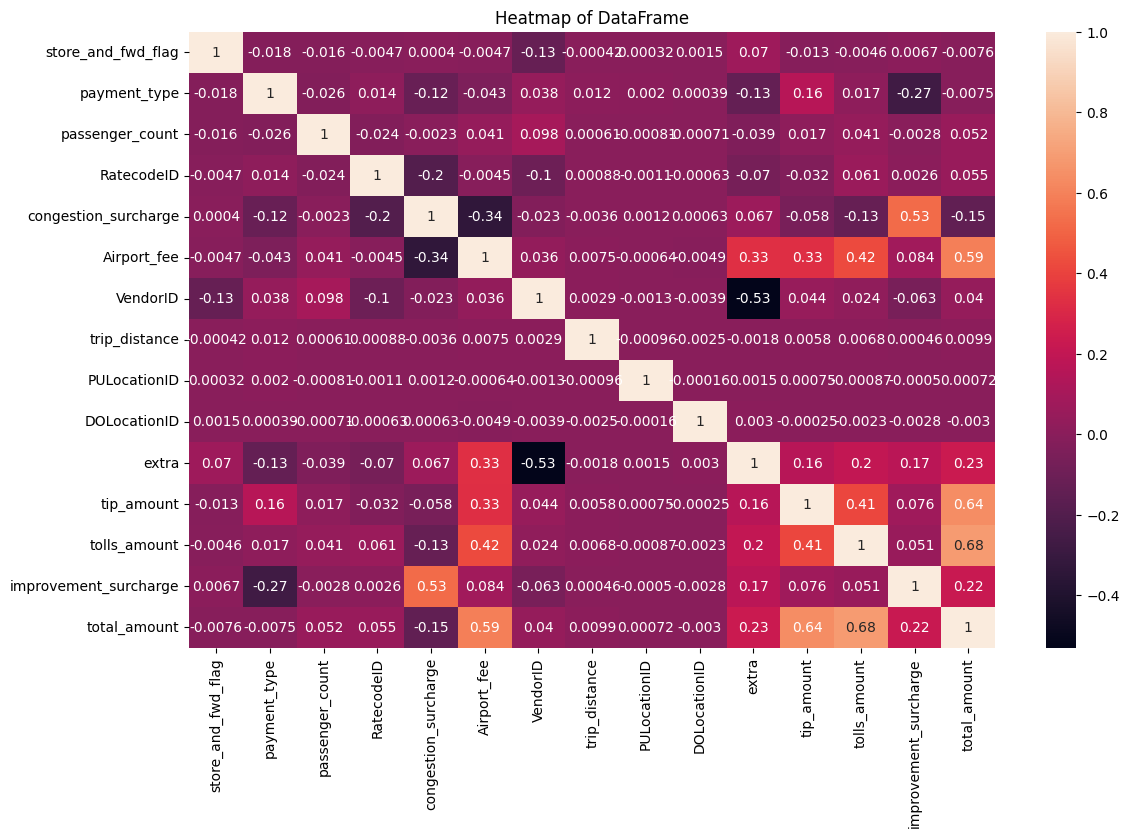

In [20]:
plt.figure(figsize=(13,8))
sns.heatmap(train_data.corr(numeric_only = True), annot=True)
plt.title('Heatmap of DataFrame')
plt.show()

In [21]:
y_train = train_data.pop('total_amount')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(train_data, y_train, test_size = 0.2, random_state = 42)

In [23]:
# Dummy Regressor

dr = DummyRegressor(strategy = 'mean')
dr.fit(X_train, y_train)
y_pred = dr.predict(X_test)
dummy_score = r2_score(y_test, y_pred)
print(dummy_score)

-3.7584352301278656e-05


In [24]:
#Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
linear_score = r2_score(y_test, y_pred)
print(linear_score)

0.7169909486857953


In [25]:
#elasticnet with gridsearch

elastic_net = ElasticNet()
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}
gsen = GridSearchCV(elastic_net, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
gsen.fit(X_train, y_train)
best_params = gsen.best_params_
best_elastic_net = gsen.best_estimator_
y_pred = best_elastic_net.predict(X_test)
elasticnet_score=r2_score(y_test,y_pred)
print(elasticnet_score)

0.7134789489073633


In [26]:
#randomforest

rfr=RandomForestRegressor(n_jobs=-1)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
randomforest_score = r2_score(y_test, y_pred)
print(randomforest_score)

0.9559847808424167


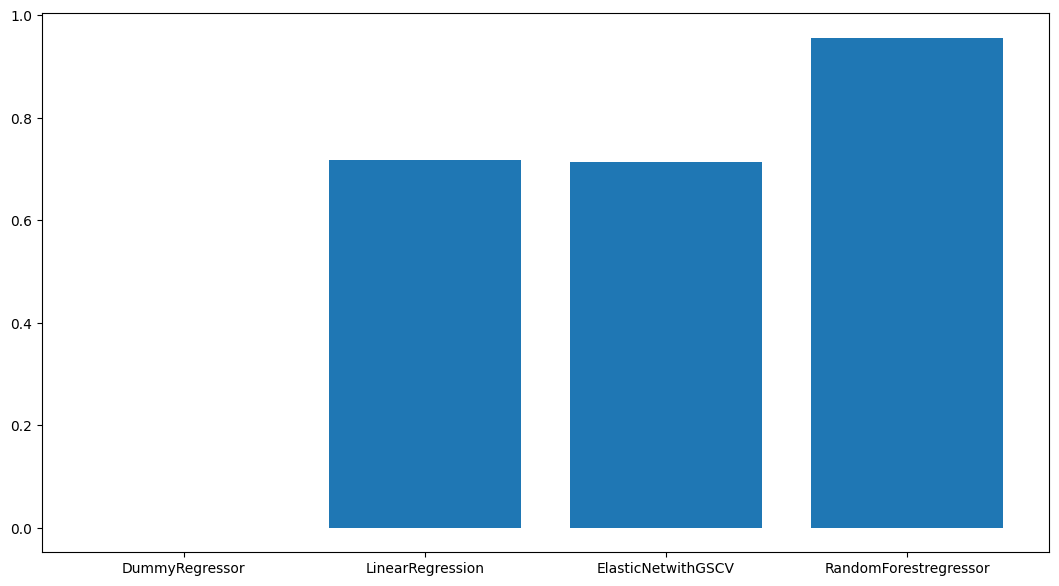

In [27]:
plt.figure(figsize=(13,7))
model_name=["DummyRegressor", "LinearRegression","ElasticNetwithGSCV", "RandomForestregressor"]
r2_score=[dummy_score, linear_score, elasticnet_score, randomforest_score]
plt.bar(x=model_name, height=r2_score)
plt.show()


Since we can see RandomForestRegressor has the best score, so we will use it for prediction on test data.



In [28]:
y_pred = rfr.predict(test_data)

In [29]:
sub_df = pd.DataFrame({'ID': range(1, len(y_pred) + 1), 'total_amount': y_pred})
sub_df.to_csv('submission.csv', index=False)